In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow import keras
import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size = 0.9, test_size = 0.1, random_state = 144)
assert x_train.shape == (45000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert x_val.shape == (5000, 32, 32, 3)
assert y_val.shape == (5000, 1)
assert y_train.shape == (45000, 1)
assert y_test.shape == (10000, 1)
# print(x_train.shape, y_train.shape, x_val.shape, y_val.shape,  x_test.shape, y_test.shape)

170508288/170498071 [==============================] - 3s 0us/step


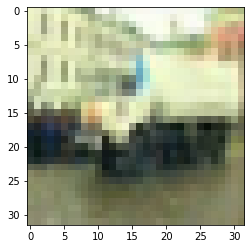

In [3]:
#Visulize one image from CIFAR
plt.imshow(x_train[0], cmap=plt.cm.binary)

#### Step-2: Normalize iamges
Now the range of pixel values is from 0 to 255. Normalize the images in training set, validation set, and test set to 0-1.

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val / 250.0

#### Step-3: Build a neural network.
Build your convolutional neural networks by adding some layers. You should use 2 convolution layers and ReLU as the default activation function. The kernel size of both layers should be 3x3. Use 32 and 64 as the number of filters for the first and the second convolutional layers, respectively. After that, flatten your input and add two more dense layers. There should be 1024 units in the first dense with ReLU activation, and use 10 hidden units in the second dense layer with softmax activation. The requirements are same for the following questions.

In [5]:
md = tf.keras.Sequential()
md.add(tf.keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', input_shape = (32, 32, 3)))
md.add(tf.keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu'))
md.add(tf.keras.layers.Flatten())
md.add(tf.keras.layers.Dense(1024, activation = 'relu'))
md.add(tf.keras.layers.Dense(10, activation = 'softmax'))

#### Step-4: Train the model
Compile model here and set your initial hyperparameters. Use SGD as the optimizer with initial learning rate 0.01. You could choose 'sparse_categorical_crossentropy' as your loss function, and the metrics should be 'accuracy'. After that, train your model for 10 epochs. The requirements are same for the following questions.

In [6]:
md.compile(optimizer = SGD(0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
md.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1407/1407 [==============================] - 43s 24ms/step - loss: 1.7741 - accuracy: 0.3676
Epoch 2/10
1407/1407 [==============================] - 34s 24ms/step - loss: 1.4367 - accuracy: 0.4889
Epoch 3/10
1407/1407 [==============================] - 33s 24ms/step - loss: 1.2633 - accuracy: 0.5528
Epoch 4/10
1407/1407 [==============================] - 33s 23ms/step - loss: 1.1226 - accuracy: 0.6053
Epoch 5/10
1407/1407 [==============================] - 34s 24ms/step - loss: 0.9994 - accuracy: 0.6514
Epoch 6/10
1407/1407 [==============================] - 33s 23ms/step - loss: 0.8733 - accuracy: 0.6934
Epoch 7/10
1407/1407 [==============================] - 33s 23ms/step - loss: 0.7407 - accuracy: 0.7453
Epoch 8/10
1407/1407 [==============================] - 33s 23ms/step - loss: 0.6003 - accuracy: 0.7971
Epoch 9/10
1407/1407 [==============================] - 33s 23ms/step - loss: 0.4542 - accuracy: 0.8510
Epoch 10/10
1407/1407 [==============================] - 33s 24m

In [7]:
#Evaluation
test_loss, test_acc = md.evaluate(x_test, y_test)
print(test_loss, test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 1.4320 - accuracy: 0.6130
1.4319608211517334 0.6129999756813049


#### Step-5: Regularization
Add one dropout layer with 0.5 drop rate between the two dense layer and apply a SGD with momentum 0.9. You can keep all other hyperparameters the same.

In [8]:
md = tf.keras.Sequential()
md.add(tf.keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', input_shape = (32, 32, 3)))
md.add(tf.keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu'))
md.add(tf.keras.layers.Flatten())
md.add(tf.keras.layers.Dense(1024, activation = 'relu'))
md.add(tf.keras.layers.Dropout(0.5))
md.add(tf.keras.layers.Dense(10, activation = 'softmax'))

md.compile(optimizer = SGD(0.01, momentum = 0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
md.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1407/1407 [==============================] - 40s 28ms/step - loss: 1.7255 - accuracy: 0.3751
Epoch 2/10
1407/1407 [==============================] - 39s 28ms/step - loss: 1.3277 - accuracy: 0.5246
Epoch 3/10
1407/1407 [==============================] - 39s 28ms/step - loss: 1.0590 - accuracy: 0.6279
Epoch 4/10
1407/1407 [==============================] - 40s 28ms/step - loss: 0.8094 - accuracy: 0.7180
Epoch 5/10
1407/1407 [==============================] - 39s 28ms/step - loss: 0.5482 - accuracy: 0.8112
Epoch 6/10
1407/1407 [==============================] - 39s 28ms/step - loss: 0.3569 - accuracy: 0.8772
Epoch 7/10
1407/1407 [==============================] - 40s 28ms/step - loss: 0.2588 - accuracy: 0.9149
Epoch 8/10
1407/1407 [==============================] - 40s 28ms/step - loss: 0.2061 - accuracy: 0.9312
Epoch 9/10
1407/1407 [==============================] - 39s 28ms/step - loss: 0.1763 - accuracy: 0.9427
Epoch 10/10
1407/1407 [==============================] - 40s 28m

In [9]:
#Evaluation
test_loss, test_acc = md.evaluate(x_test, y_test)
print(test_loss, test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 1.5265 - accuracy: 0.6374
1.5264791250228882 0.6373999714851379


#### Step-6: Deeper neural network

Try to add two more convolution layers in your model (four in total). Use 128 as the number of filters for two extra convolution layers, and 3x3 as the kernel size.

In [10]:
md = tf.keras.Sequential()
md.add(tf.keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', input_shape = (32, 32, 3)))
md.add(tf.keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu'))
md.add(tf.keras.layers.Conv2D(128, kernel_size = 3, activation = 'relu'))
md.add(tf.keras.layers.Conv2D(128, kernel_size = 3, activation = 'relu'))
md.add(tf.keras.layers.Flatten())
md.add(tf.keras.layers.Dense(1024, activation = 'relu'))
md.add(tf.keras.layers.Dropout(0.5))
md.add(tf.keras.layers.Dense(10, activation = 'softmax'))

md.compile(optimizer = SGD(0.01, momentum = 0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
md.fit(x_train, y_train, epochs = 10)


Epoch 1/10
1407/1407 [==============================] - 72s 51ms/step - loss: 1.8333 - accuracy: 0.3309
Epoch 2/10
1407/1407 [==============================] - 72s 51ms/step - loss: 1.4332 - accuracy: 0.4785
Epoch 3/10
1407/1407 [==============================] - 70s 50ms/step - loss: 1.1446 - accuracy: 0.5943
Epoch 4/10
1407/1407 [==============================] - 70s 50ms/step - loss: 0.8739 - accuracy: 0.6940
Epoch 5/10
1407/1407 [==============================] - 70s 50ms/step - loss: 0.5915 - accuracy: 0.7942
Epoch 6/10
1407/1407 [==============================] - 70s 50ms/step - loss: 0.3658 - accuracy: 0.8761
Epoch 7/10
1407/1407 [==============================] - 71s 50ms/step - loss: 0.2500 - accuracy: 0.9166
Epoch 8/10
1407/1407 [==============================] - 70s 50ms/step - loss: 0.1977 - accuracy: 0.9340
Epoch 9/10
1407/1407 [==============================] - 69s 49ms/step - loss: 0.1523 - accuracy: 0.9490
Epoch 10/10
1407/1407 [==============================] - 70s 50m

In [11]:
#Evaluation
test_loss, test_acc = md.evaluate(x_test, y_test)
print(test_loss, test_acc)

313/313 [==============================] - 5s 14ms/step - loss: 1.5884 - accuracy: 0.6320
1.5883691310882568 0.6320000290870667


#### Step-7: Activation function

Try another activation function, such as elu, P-ReLU.

In [13]:
md = tf.keras.Sequential()
md.add(tf.keras.layers.Conv2D(32, kernel_size = 3, activation = 'elu', input_shape = (32, 32, 3)))
md.add(tf.keras.layers.Conv2D(64, kernel_size = 3, activation = 'elu'))
md.add(tf.keras.layers.Flatten())
md.add(tf.keras.layers.Dense(1024, activation = 'elu'))
md.add(tf.keras.layers.Dropout(0.5))
md.add(tf.keras.layers.Dense(10, activation = 'elu'))

md.compile(optimizer = SGD(0.01, momentum = 0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
md.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1407/1407 [==============================] - 41s 28ms/step - loss: 12.3705 - accuracy: 0.1006
Epoch 2/10
1407/1407 [==============================] - 40s 28ms/step - loss: 12.3841 - accuracy: 0.1005
Epoch 3/10
1407/1407 [==============================] - 39s 28ms/step - loss: 12.3841 - accuracy: 0.1001
Epoch 4/10
1407/1407 [==============================] - 39s 28ms/step - loss: 12.3841 - accuracy: 0.1006
Epoch 5/10
1407/1407 [==============================] - 39s 28ms/step - loss: 12.3842 - accuracy: 0.1004
Epoch 6/10
1407/1407 [==============================] - 39s 28ms/step - loss: 12.3842 - accuracy: 0.1006
Epoch 7/10
1407/1407 [==============================] - 39s 28ms/step - loss: 12.3841 - accuracy: 0.1006
Epoch 8/10
1407/1407 [==============================] - 39s 28ms/step - loss: 12.3841 - accuracy: 0.1005
Epoch 9/10
1407/1407 [==============================] - 39s 28ms/step - loss: 12.3841 - accuracy: 0.1007
Epoch 10/10
1407/1407 [==============================] 

In [14]:
#Evaluation
test_loss, test_acc = md.evaluate(x_test, y_test)
print(test_loss, test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 12.3813 - accuracy: 0.1000
12.38127326965332 0.10000000149011612
